In [1]:
# import the libraries need to be used
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
%matplotlib inline

In [2]:
data = pd.read_csv("HK/top3.csv")

In [3]:
data = data.drop({'Unnamed: 0', 'host_id', 'minimum_nights','number_of_reviews', 'calculated_host_listings_count', 'availability_365', 'price'}, axis = 1)
data.head(2)

,id,neighbourhood,latitude,longitude,room_type
0,69074,CENTRAL & WESTERN,22.28352,114.15018,Entire home/apt
1,103760,CENTRAL & WESTERN,22.28407,114.15570,Entire home/apt


In [4]:
name = set(data.neighbourhood)

In [5]:
data[data.room_type == 'Entire home/apt'].shape

(4806, 5)

In [6]:
data[data.room_type == 'Private room'].shape

(4419, 5)

In [7]:
data[data.room_type == 'Shared room'].shape

(447, 5)

# Location Analysis by Using Folium 

In [8]:
data_yau = data[data.neighbourhood == 'YAU TSIM MONG']

In [9]:
import folium 

In [10]:
from IPython.display import display

In [11]:
# build a dataframe of main MTR stations in study area
tsuen_wan_line = {'station':['Tsim Sha Tsui Station', 'Jordan Station', 'Yau Ma Tei Station', 'Mong Kok Station', 'Prince Edward Station'],
                'latitude':[22.297560, 22.3048588, 22.313351, 22.319232, 22.324611],
            'longitude':[114.172209, 114.17172, 114.170572, 114.169349, 114.168269]}

tsuen_wan_line = pd.DataFrame(tsuen_wan_line)

In [12]:
tsuen_wan_line

,station,latitude,longitude
0,Tsim Sha Tsui Station,22.297560,114.172209
1,Jordan Station,22.304859,114.171720
2,Yau Ma Tei Station,22.313351,114.170572
3,Mong Kok Station,22.319232,114.169349
4,Prince Edward Station,22.324611,114.168269


In [13]:
coordinates  = list(zip(tsuen_wan_line.latitude, tsuen_wan_line.longitude))

In [14]:
coordinates

[(22.29756, 114.172209),
 (22.3048588, 114.17172),
 (22.313351, 114.170572),
 (22.319232, 114.169349),
 (22.324611, 114.168269)]

In [15]:
# Define a map centered around YAU TSIM MONG district 
hk_map_en = folium.Map(location=[22.31,114.18],zoom_start = 13)

In [16]:

# Firstly, plotting out all data of entire home or apartment as point features
data_yau[data_yau.room_type == 'Entire home/apt'].apply(lambda row:folium.CircleMarker(location=[row["latitude"], row["longitude"]],radius=1,color='red',fill=False,popup='Entire home/apt',fill_opacity=0.6)
                                             .add_to(hk_map_en), axis=1)

24      <folium.vector_layers.CircleMarker object at 0...
25      <folium.vector_layers.CircleMarker object at 0...
31      <folium.vector_layers.CircleMarker object at 0...
44      <folium.vector_layers.CircleMarker object at 0...
47      <folium.vector_layers.CircleMarker object at 0...
                              ...                        
9621    <folium.vector_layers.CircleMarker object at 0...
9629    <folium.vector_layers.CircleMarker object at 0...
9632    <folium.vector_layers.CircleMarker object at 0...
9633    <folium.vector_layers.CircleMarker object at 0...
9668    <folium.vector_layers.CircleMarker object at 0...
Length: 1661, dtype: object

In [17]:
# And then, drawing out the Tsuen Wan Line of MTR, one of most important MTR route in HK
folium.PolyLine(locations=coordinates,weight=5,color = 'purple').add_to(hk_map_en)

# Plotting the points of the MTR stations in our study area.
for lat, lng, label in zip(tsuen_wan_line.latitude, tsuen_wan_line.longitude, tsuen_wan_line.station.astype(str)):
    folium.CircleMarker(
            [lat, lng],
            radius=4,
            color='blue',
            fill=True,
            popup=label,
            fill_color='blue',
            fill_opacity=1
        ).add_to(hk_map_en)


In [18]:
# hk_map_en.save("map_entire.html")

**Conduct the same processes for the data type of private room**

In [19]:
# Define a map centered around YAU TSIM MONG district 
hk_map_pr = folium.Map(location=[22.31,114.18],zoom_start = 13)

In [20]:
# Firstly, plotting out all data of entire home or apartment as point features
data_yau[data_yau.room_type == 'Private room'].apply(lambda row:folium.CircleMarker(location=[row["latitude"], row["longitude"]],radius=1,color='coral',fill=False,popup='Private room',fill_opacity=0.6)
                                             .add_to(hk_map_pr), axis=1)

7       <folium.vector_layers.CircleMarker object at 0...
51      <folium.vector_layers.CircleMarker object at 0...
53      <folium.vector_layers.CircleMarker object at 0...
55      <folium.vector_layers.CircleMarker object at 0...
56      <folium.vector_layers.CircleMarker object at 0...
                              ...                        
9661    <folium.vector_layers.CircleMarker object at 0...
9663    <folium.vector_layers.CircleMarker object at 0...
9664    <folium.vector_layers.CircleMarker object at 0...
9670    <folium.vector_layers.CircleMarker object at 0...
9671    <folium.vector_layers.CircleMarker object at 0...
Length: 2809, dtype: object

In [21]:
# And then, drawing out the Tsuen Wan Line of MTR, one of most important MTR route in HK
folium.PolyLine(locations=coordinates,weight=5,color = 'purple').add_to(hk_map_pr)

# Plotting the points of the MTR stations in our study area.
for lat, lng, label in zip(tsuen_wan_line.latitude, tsuen_wan_line.longitude, tsuen_wan_line.station.astype(str)):
    folium.CircleMarker(
            [lat, lng],
            radius=4,
            color='blue',
            fill=True,
            popup=label,
            fill_color='blue',
            fill_opacity=1
        ).add_to(hk_map_pr)


In [22]:
# hk_map_pr.save("map_private.html")

# Using MarkerCluster to group markers into different cluster

In [23]:
from folium import plugins

In [24]:
# create a map object of Yau Tsim Mong district
hk_map = folium.Map(location=[22.31,114.18],zoom_start = 13)

In [25]:
# And then, drawing out the Tsuen Wan Line of MTR, one of most important MTR route in HK
folium.PolyLine(locations=coordinates,weight=5,color = 'purple').add_to(hk_map)

# Plotting the points of the MTR stations in our study area.
for lat, lng, label in zip(tsuen_wan_line.latitude, tsuen_wan_line.longitude, tsuen_wan_line.station.astype(str)):
    folium.CircleMarker(
            [lat, lng],
            radius=4,
            color='blue',
            fill=True,
            popup=label,
            fill_color='blue',
            fill_opacity=1
        ).add_to(hk_map)


In [26]:
# Instatiate a mark cluster object for the Airbnb listings
listings = plugins.MarkerCluster().add_to(hk_map)
# Display the listings inside Yau Tsim Mong
for lat, lng, label, in zip(data_yau.latitude, data_yau.longitude, data_yau.room_type):
    if label != 0:
        folium.Marker(
            location=[lat,lng],
            icon=None,
            popup=label
        ).add_to(listings)

In [27]:
# hk_map.save("map_cluster.html")

In [28]:
import geopandas as gpd

In [29]:
# Importing the Hong Kong 18 districts boundary GeoJSON file
map_data = gpd.read_file("HK/Hong_Kong_18_Districts/Hong_Kong_18_Districts.shp")

In [30]:
# Dropping the empty column
map_data.drop("TCNAME", axis = 1, inplace = True)

In [31]:
{'CENTRAL & WESTERN', 'WAN CHAI', 'YAU TSIM MONG'}

{'CENTRAL & WESTERN', 'WAN CHAI', 'YAU TSIM MONG'}

In [32]:
map_data = map_data.loc[map_data['ENAME'].isin(name)]

In [33]:
map_data["center"] = map_data["geometry"].centroid
top3_points = map_data.copy()
top3_points.set_geometry("center", inplace = True)

In [34]:
data.head()

,id,neighbourhood,latitude,longitude,room_type
0,69074,CENTRAL & WESTERN,22.28352,114.15018,Entire home/apt
1,103760,CENTRAL & WESTERN,22.28407,114.15570,Entire home/apt
2,132773,CENTRAL & WESTERN,22.28868,114.14494,Entire home/apt
3,133390,CENTRAL & WESTERN,22.28343,114.15539,Entire home/apt
4,163214,CENTRAL & WESTERN,22.28494,114.15251,Entire home/apt


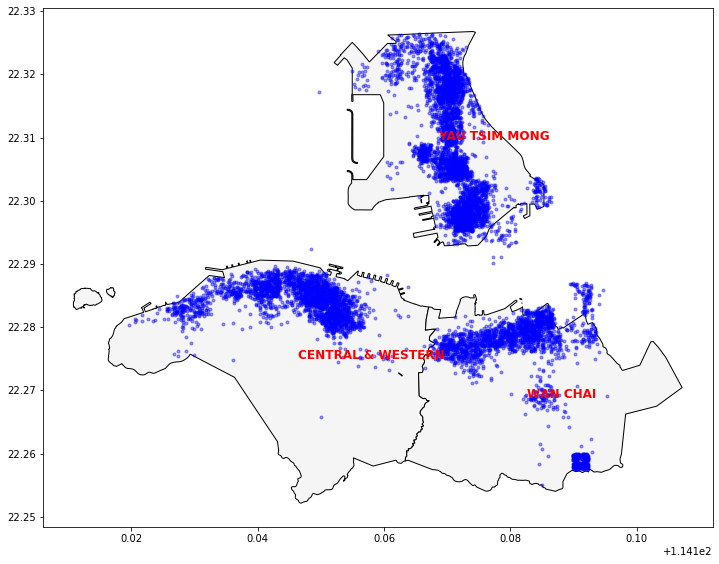

In [35]:
map_top3 = map_data.plot(figsize=(12,10), color = 'whitesmoke', edgecolor='black', linewidth = 1, legend = True)
texts = []
plt.scatter(data['longitude'], data['latitude'], c='blue', marker = '.', alpha = 0.4)
for x, y, label in zip(top3_points.geometry.x, top3_points.geometry.y, top3_points.ENAME):
    texts.append(plt.text(x, y, label, fontsize = 8, size = 12, color = 'red', weight ='bold'))

**First, we would apply the K-MEANS algorithm**

In [36]:
# import KMeans
from sklearn.cluster import KMeans

**For the district level, we assume that there are 3 clusters existing within our study area, for the YAU TSIM MONG, CENTRAL & WESTERN, and WAN CHAI, respectively**

In [37]:
# create np array for data points
points = data[['longitude', 'latitude']].to_numpy()

In [38]:
# Create kmeans object
kmeans = KMeans(n_clusters=3)
# Fit kmeans object to data
kmeans.fit(points)
# print location of clusters learn by keams object
print(kmeans.cluster_centers_)
# save new clusters for chart
y_km = kmeans.fit_predict(points)

[[114.18202432  22.27517135]
 [114.171044    22.30801942]
 [114.14645164  22.284201  ]]


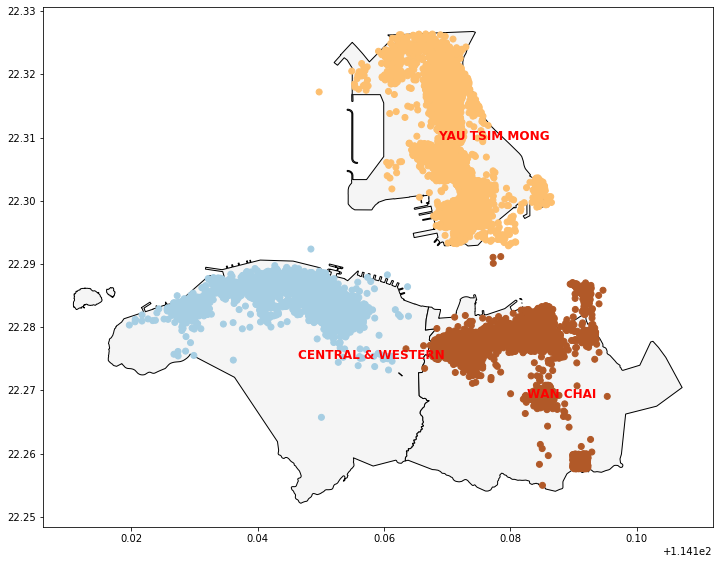

In [39]:
map_top3 = map_data.plot(figsize=(12,10), color = 'whitesmoke', edgecolor='black', linewidth = 1, legend = True)
texts = []
plt.scatter(points[:,0], points[:,1],c=y_km, cmap='Paired')
# plt.scatter(points[y_km ==0,0], points[y_km == 0,1], s=100, c='cyan', marker = '.', alpha = 0.4)
# plt.scatter(points[y_km ==1,0], points[y_km == 1,1], s=100, c='yellow', marker = '.', alpha = 0.4)
# plt.scatter(points[y_km ==2,0], points[y_km == 2,1], s=100, c='blue', marker = '.', alpha = 0.4)
for x, y, label in zip(top3_points.geometry.x, top3_points.geometry.y, top3_points.ENAME):
    texts.append(plt.text(x, y, label, fontsize = 8, size = 12, color = 'red', weight ='bold'))

# For DBScan clustering 

In [40]:
# Importing DBSCAN model for clustering
from sklearn.cluster import DBSCAN

In [41]:
# Instantiate the DBSCAN model. 
# Here, epsilon is 0.001 and minimum number of points required to form a cluster is 2.
dbscan = DBSCAN(eps = 0.0008, min_samples = 20)
# Fit kmeans object to data
dbscan.fit(points)
# save new clusters for chart
y_db = dbscan.fit_predict(points)
labels = dbscan.labels_

In [42]:
len(set(labels))

11

**Plot the Clusters in the Map**

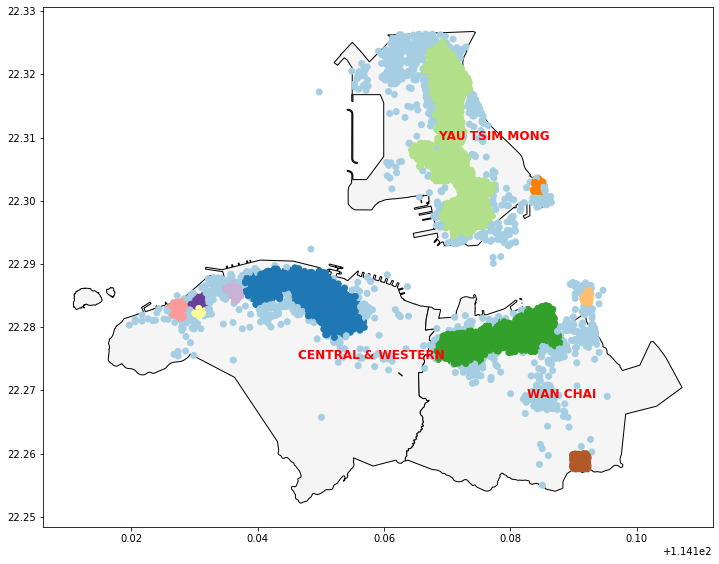

In [43]:
map_top3 = map_data.plot(figsize=(12,10), color = 'whitesmoke', edgecolor='black', linewidth = 1, legend = True)
texts = []
plt.scatter(points[:,0], points[:,1],c=y_db, cmap='Paired')
for x, y, label in zip(top3_points.geometry.x, top3_points.geometry.y, top3_points.ENAME):
    texts.append(plt.text(x, y, label, fontsize = 8, size = 12, color = 'red', weight ='bold'))

In [44]:
tsuen_wan_line

,station,latitude,longitude
0,Tsim Sha Tsui Station,22.297560,114.172209
1,Jordan Station,22.304859,114.171720
2,Yau Ma Tei Station,22.313351,114.170572
3,Mong Kok Station,22.319232,114.169349
4,Prince Edward Station,22.324611,114.168269


In [45]:
data_yau.head()

,id,neighbourhood,latitude,longitude,room_type
7,228510,YAU TSIM MONG,22.30983,114.16911,Private room
24,412404,YAU TSIM MONG,22.29701,114.17138,Entire home/apt
25,415520,YAU TSIM MONG,22.30598,114.16590,Entire home/apt
31,498484,YAU TSIM MONG,22.32193,114.16213,Entire home/apt
44,586083,YAU TSIM MONG,22.29846,114.17233,Entire home/apt


In [46]:
map_yau = map_data[map_data.ENAME == 'YAU TSIM MONG']

In [47]:
yau_points = top3_points[top3_points.ENAME == 'YAU TSIM MONG']

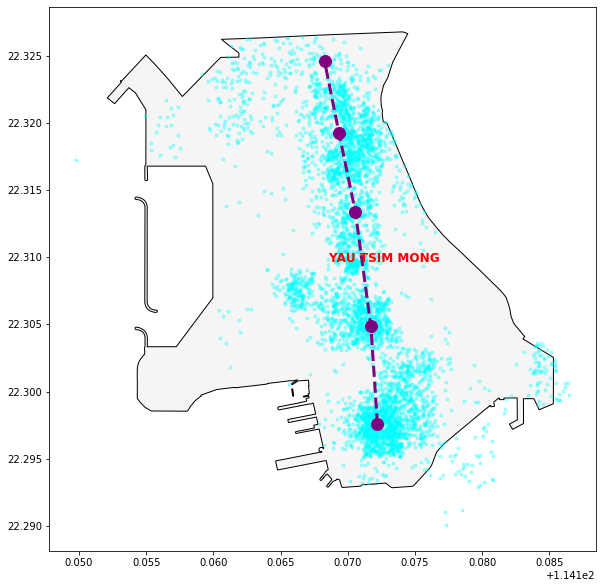

In [48]:
map_yau.plot(figsize=(12,10), color = 'whitesmoke', edgecolor='black', linewidth = 1, legend = True)
plt.scatter(data_yau['longitude'], data_yau['latitude'], c='cyan', marker = '.', alpha = 0.3)
plt.plot(tsuen_wan_line.longitude, tsuen_wan_line.latitude, color='purple', marker='o', linestyle='dashed', linewidth=3, markersize=12)
for x, y, label in zip(yau_points.geometry.x, yau_points.geometry.y, yau_points.ENAME):
    texts.append(plt.text(x, y, label, fontsize = 8, size = 12, color = 'red', weight ='bold'))

# For K-Means clustering 

In [49]:
# create np array for data points
points_yau = data_yau[['longitude', 'latitude']].to_numpy()

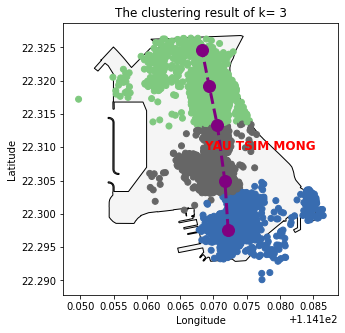

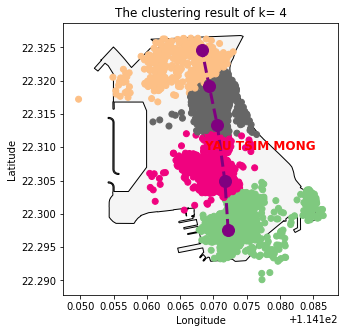

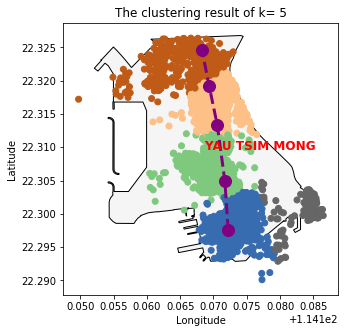

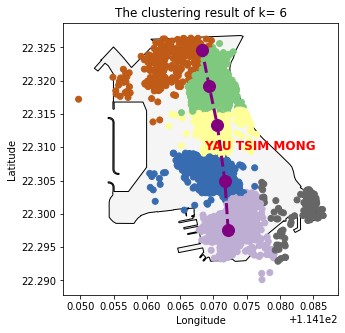

In [50]:
K = [3,4,5,6]
for i,k in enumerate(K):
    # Create kmeans object
    kmeans = KMeans(n_clusters=k)
    # Fit kmeans object to data
    kmeans.fit(points_yau)
    # print location of clusters learn by keams object
    #print(kmeans.cluster_centers_)
    # save new clusters for chart
    y_km = kmeans.fit_predict(points_yau)
    
    map_yau.plot(figsize=(6,5), color = 'whitesmoke', edgecolor='black', linewidth = 1, legend = True)
    plt.scatter(points_yau[:,0], points_yau[:,1],c=y_km, cmap='Accent')
    plt.plot(tsuen_wan_line.longitude, tsuen_wan_line.latitude, color='purple', marker='o', linestyle='dashed', linewidth=3, markersize=12)
    for x, y, label in zip(yau_points.geometry.x, yau_points.geometry.y, yau_points.ENAME):
        texts.append(plt.text(x, y, label, fontsize = 8, size = 12, color = 'red', weight ='bold'))
    plt.title("The clustering result of k= " + str(k))
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")

In [51]:
# Create kmeans object
kmeans = KMeans(n_clusters=6)
# Fit kmeans object to data
kmeans.fit(points_yau)
# print location of clusters learn by keams object
print(kmeans.cluster_centers_)
# save new clusters for chart
y_km = kmeans.fit_predict(points_yau)

[[114.16399202  22.32259072]
 [114.16997438  22.30578306]
 [114.1730987   22.2980076 ]
 [114.17049377  22.31195276]
 [114.17006277  22.3189151 ]
 [114.18281239  22.30039717]]


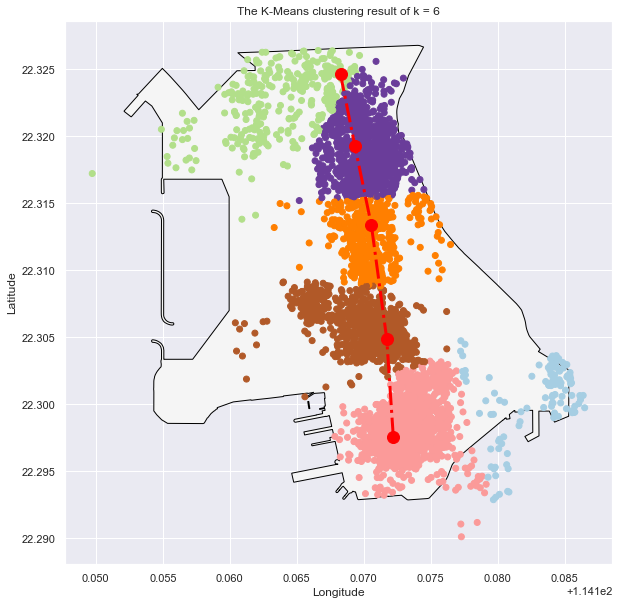

In [61]:
map_yau.plot(figsize=(12,10), color = 'whitesmoke', edgecolor='black', linewidth = 1, legend = True)
plt.scatter(points_yau[:,0], points_yau[:,1],c=y_km, cmap='Paired')
plt.plot(tsuen_wan_line.longitude, tsuen_wan_line.latitude, color='red', marker='o', linestyle='-.', linewidth=3, markersize=12)
plt.title("The K-Means clustering result of k = 6")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.savefig('kmeans.jpg')

# For DBScan clustering 

In [53]:
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

C:\Users\Martin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [54]:
points_yau_en = data_yau[data_yau.room_type == 'Entire home/apt'][['longitude', 'latitude']].to_numpy()
# create np array for data points
# points = data[['longitude', 'latitude']].to_numpy()

In [55]:
neigh = NearestNeighbors(n_neighbors=3)
nbrs = neigh.fit(points_yau)
distances, indices = nbrs.kneighbors(points_yau)

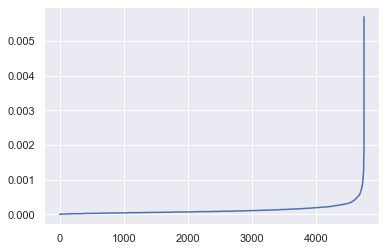

In [56]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

Text(129.63539907106656, 0.5, 'Latitude')

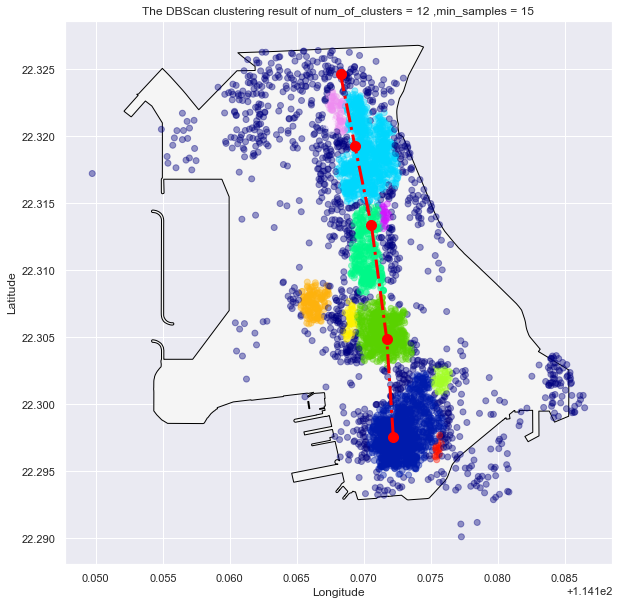

In [62]:
    dbscan = DBSCAN(eps=2/6371., min_samples=15, algorithm='ball_tree', metric='haversine')
    # Fit kmeans object to data
    dbscan.fit(points_yau)
    # save new clusters for chart
    y_db = dbscan.fit_predict(points_yau)
    labels = dbscan.labels_
    num_of_clusters = len(set(labels))
    
    map_yau.plot(figsize=(12,10), color = 'whitesmoke', edgecolor='black', linewidth = 1, legend = True)
    plt.scatter(points_yau[:,0], points_yau[:,1],c=y_db, cmap='gist_ncar', alpha = 0.4)
    plt.plot(tsuen_wan_line.longitude, tsuen_wan_line.latitude, color='red', marker='.', linestyle='-.', linewidth=3, markersize=20)
    plt.title("The DBScan clustering result of num_of_clusters = " + str(num_of_clusters) + ' ,min_samples = 15')
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")

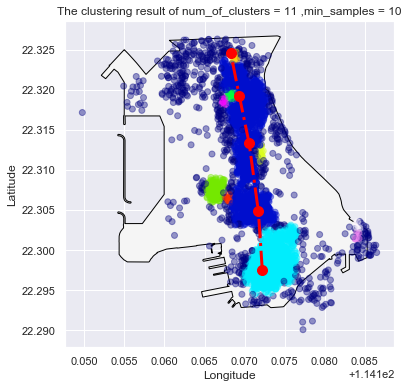

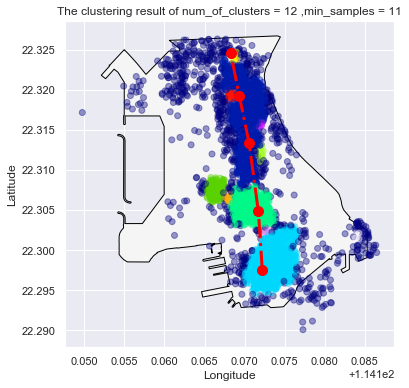

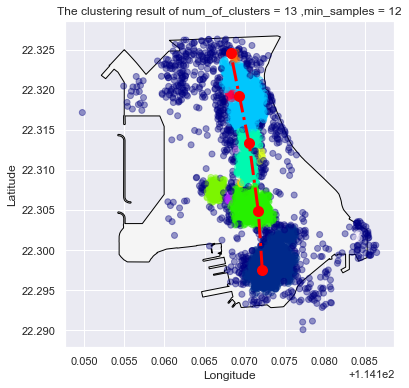

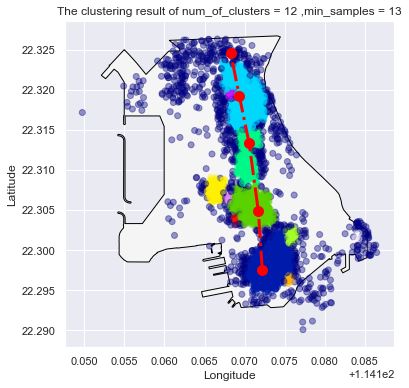

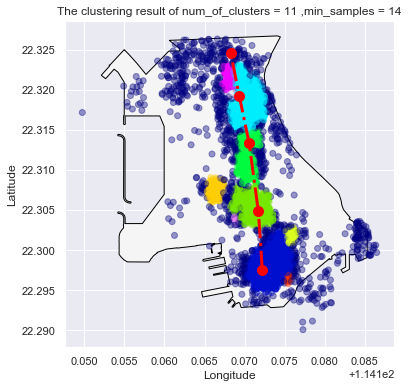

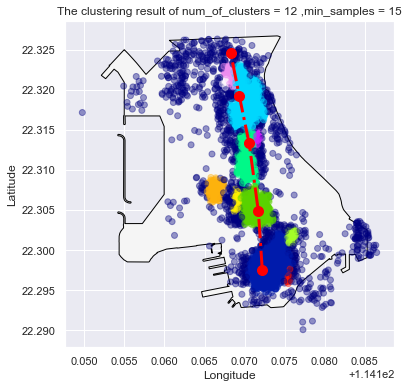

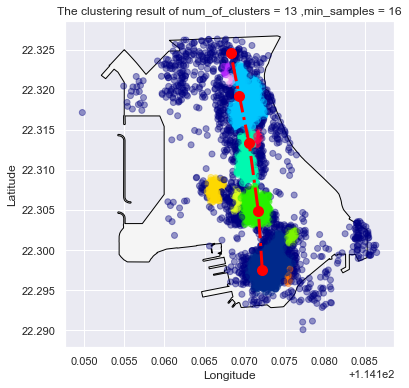

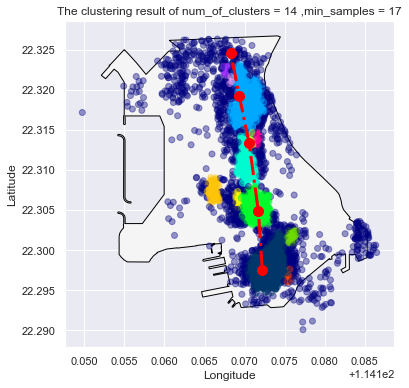

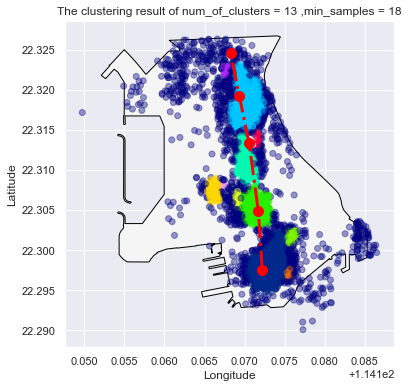

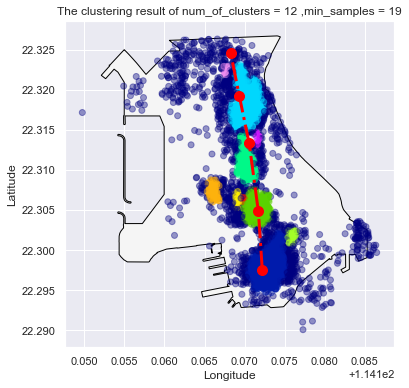

In [58]:
for i, m in enumerate(range(10,20)):
    dbscan = DBSCAN(eps=2/6371., min_samples= m, algorithm='ball_tree', metric='haversine')
    # Fit kmeans object to data
    dbscan.fit(points_yau)
    # save new clusters for chart
    y_db = dbscan.fit_predict(points_yau)
    labels = dbscan.labels_
    num_of_clusters = len(set(labels))
    
    map_yau.plot(figsize=(8,6), color = 'whitesmoke', edgecolor='black', linewidth = 1, legend = True)
    plt.scatter(points_yau[:,0], points_yau[:,1],c=y_db, cmap='gist_ncar', alpha = 0.4)
    plt.plot(tsuen_wan_line.longitude, tsuen_wan_line.latitude, color='red', marker='.', linestyle='-.', linewidth=3, markersize=20)
    plt.title("The clustering result of num_of_clusters = " + str(num_of_clusters) + ' ,min_samples = '+ str(m))
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")